# Recommendation System: Anime Dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation


import warnings 
warnings.filterwarnings("ignore")

In [44]:
data=pd.read_csv('anime.csv',)

In [45]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
data1=data.drop(columns='type')
data1=data.drop('members',axis=1)
data1=data1.drop('genre',axis=1)

In [5]:
data1.describe()

,anime_id,rating
count,12294.000000,12064.000000
mean,14058.221653,6.473902
std,11455.294701,1.026746
min,1.000000,1.670000
25%,3484.250000,5.880000
50%,10260.500000,6.570000
75%,24794.500000,7.180000
max,34527.000000,10.000000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 480.4+ KB


In [7]:
len(data1['anime_id'].unique())

12294

In [48]:
data1['episodes'].value_counts()

1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: episodes, Length: 187, dtype: int64

In [49]:
data1.isnull().sum()

anime_id      0
name          0
type         25
episodes      0
rating      230
dtype: int64

In [50]:
data1=data1.dropna()

In [51]:
data1.isnull().sum()

anime_id    0
name        0
type        0
episodes    0
rating      0
dtype: int64

In [52]:
data1.head()

,anime_id,name,type,episodes,rating
0,32281,Kimi no Na wa.,Movie,1,9.37
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26
2,28977,Gintama°,TV,51,9.25
3,9253,Steins;Gate,TV,24,9.17
4,9969,Gintama&#039;,TV,51,9.16


In [53]:
data1.groupby(['name','rating']).count().sort_values(ascending=False,by='name').head()

,,anime_id,type,episodes
name,rating,,,
◯,4.22,1,1,1
Üks Uks,6.17,1,1,1
xxxHOLiC Shunmuki,8.17,1,1,1
xxxHOLiC Rou,8.32,1,1,1
xxxHOLiC Movie: Manatsu no Yoru no Yume,8.04,1,1,1


In [54]:
data1.groupby(['name','rating']).mean().sort_values(ascending=False,by='name').head()

,,anime_id
name,rating,
◯,4.22,31687.0
Üks Uks,6.17,29708.0
xxxHOLiC Shunmuki,8.17,4918.0
xxxHOLiC Rou,8.32,6864.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,8.04,793.0


### Visualization 

<Axes: >

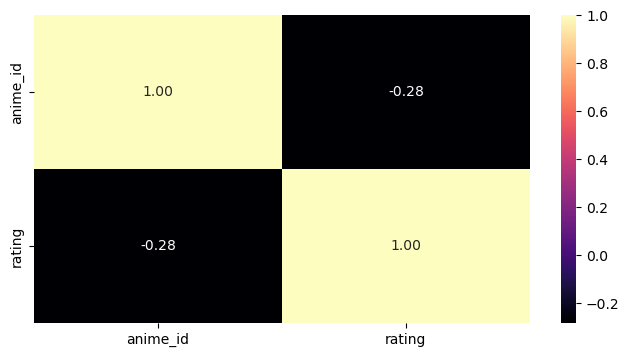

In [55]:
plt.figure(figsize = (8, 4));
sns.heatmap(data1.corr(), cmap='magma', annot=True, fmt=".2f")

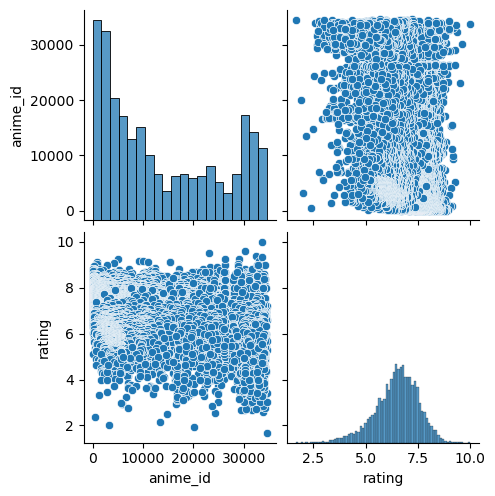

In [56]:
sns.pairplot(data1)

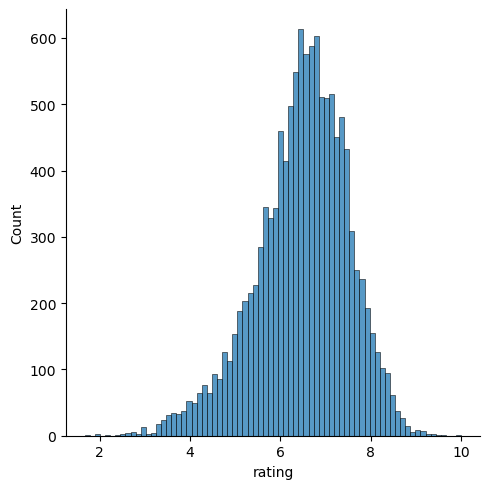

In [57]:
sns.displot(data1['rating'])

In [58]:
new_df=data1.pivot_table(index='anime_id',columns='name',values='rating').reset_index(drop=True)

In [59]:
new_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
new_df=new_df.fillna(0,axis=1)
new_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
user=1-pairwise_distances(new_df.values,metric='cosine')
user

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [62]:
user_df=pd.DataFrame(user)
user_df.index=data1['anime_id'].unique()
user_df.columns=data1['anime_id'].unique()

In [63]:
user_df.iloc[0:5,0:5]

,32281,5114,28977,9253,9969
32281,1.0,0.0,0.0,0.0,0.0
5114,0.0,1.0,0.0,0.0,0.0
28977,0.0,0.0,1.0,0.0,0.0
9253,0.0,0.0,0.0,1.0,0.0
9969,0.0,0.0,0.0,0.0,1.0


In [64]:
np.fill_diagonal(user, 0)

In [65]:
user_df.iloc[0:5,0:5]

,32281,5114,28977,9253,9969
32281,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0


In [66]:
user_df.idxmax(axis=1)[0:5]

32281    32281
5114     32281
28977    32281
9253     32281
9969     32281
dtype: int64

In [71]:
data1[(data1['anime_id']==32281) | (data1['anime_id']==5114) | (data1['anime_id']==9253)|(data1['anime_id']==9969)]

,anime_id,name,type,episodes,rating
0,32281,Kimi no Na wa.,Movie,1,9.37
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26
3,9253,Steins;Gate,TV,24,9.17
4,9969,Gintama&#039;,TV,51,9.16


In [73]:
user_1=data1[data1['anime_id']==32281]
user_2=data1[data1['anime_id']==5114]
user_3=data1[data1['anime_id']==9253]
user_4=data1[data1['anime_id']==9969]

In [79]:
user_1['name']
user_2['name']
user_3['name']
user_4['name']

4    Gintama&#039;
Name: name, dtype: object

In [80]:
user_1['name']

0    Kimi no Na wa.
Name: name, dtype: object

In [81]:
user_2['name']

1    Fullmetal Alchemist: Brotherhood
Name: name, dtype: object

In [82]:
user_3['name']

3    Steins;Gate
Name: name, dtype: object

In [83]:
pd.merge(user_1,user_2, on='name',how='outer')

,anime_id_x,name,type_x,episodes_x,rating_x,anime_id_y,type_y,episodes_y,rating_y
0,32281.0,Kimi no Na wa.,Movie,1,9.37,NaN,NaN,NaN,NaN
1,NaN,Fullmetal Alchemist: Brotherhood,NaN,NaN,NaN,5114.0,TV,64,9.26
